In [ ]:
# Prediction problem

In [101]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from sklearn import metrics
from sklearn import tree

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]

## 1. Reading the data

In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
#df

## 2. Exploratory Data Analisys

In [16]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<Axes: >

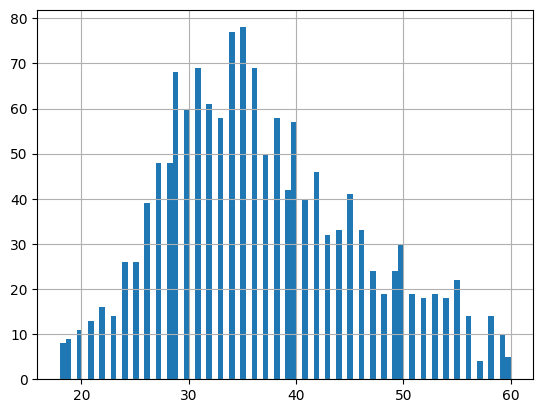

In [9]:
df["Age"].hist(bins=80)

<Axes: >

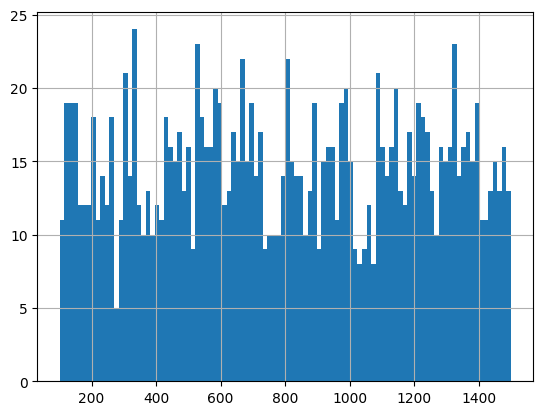

In [15]:
#df.boxplot(column="DailyRate")
df["DailyRate"].hist(bins=100)

# 3. Data Preprocessing

In [129]:
df["Attrition"] = df["Attrition"].map({'Yes':1, 'No':0})
df["BusinessTravel"] = df["BusinessTravel"].map({'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2})
df["isManager"] = df["JobRole"].isin(["Manufacturing Director", "Manager", "Research Director"])
df["OverTime"] = df["OverTime"].map({'Yes':1, 'No':0})
df = df.drop(columns=["Over18"])
df = pd.get_dummies(df, columns=["Department", "EducationField", "Gender", "JobRole", "MaritalStatus"])

df["YearsInCurrentRole/YearsAtCompany"] = df["YearsInCurrentRole"] / df["YearsAtCompany"]
df["YearsSinceLastPromotion/YearsAtCompany"] = df["YearsSinceLastPromotion"] / df["YearsAtCompany"]

df = df.fillna(0)

# 4. Train the model (version 1)

In [29]:
X = df[df.columns.drop("Attrition")]
y = df["Attrition"]

In [68]:
# The model I will train
clf = sk.tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
clf.fit(X, y)

#sk.tree.plot_tree(clf, feature_names=X.columns)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [69]:
y_pred = clf.predict(X)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

# 4. Train the model (version 2)

In [130]:
X = df[df.columns.drop("Attrition")]
y = df["Attrition"]

# split the data (X, y), 80% training (X_train, y_train) and 20% testing (X_test, y_test)

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, train_size=0.8, random_state=42)
# X.shape --> 1470
# X_train.shape --> 1176
# X_test --> 294

[Text(0.5, 0.875, 'OverTime <= 0.5\ngini = 0.28\nsamples = 1176\nvalue = [978, 198]'),
 Text(0.25, 0.625, 'TotalWorkingYears <= 1.5\ngini = 0.182\nsamples = 837\nvalue = [752, 85]'),
 Text(0.125, 0.375, 'HourlyRate <= 58.5\ngini = 0.473\nsamples = 52\nvalue = [32, 20]'),
 Text(0.0625, 0.125, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.375, 0.375, 'StockOptionLevel <= 0.5\ngini = 0.152\nsamples = 785\nvalue = [720, 65]'),
 Text(0.3125, 0.125, 'gini = 0.236\nsamples = 308\nvalue = [266, 42]'),
 Text(0.4375, 0.125, 'gini = 0.092\nsamples = 477\nvalue = [454, 23]'),
 Text(0.75, 0.625, 'MonthlyIncome <= 2475.0\ngini = 0.444\nsamples = 339\nvalue = [226, 113]'),
 Text(0.625, 0.375, 'DailyRate <= 931.0\ngini = 0.379\nsamples = 63\nvalue = [16, 47]'),
 Text(0.5625, 0.125, 'gini = 0.184\nsamples = 39\nvalue = [4, 35]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.875, 0.375, 'MaritalS

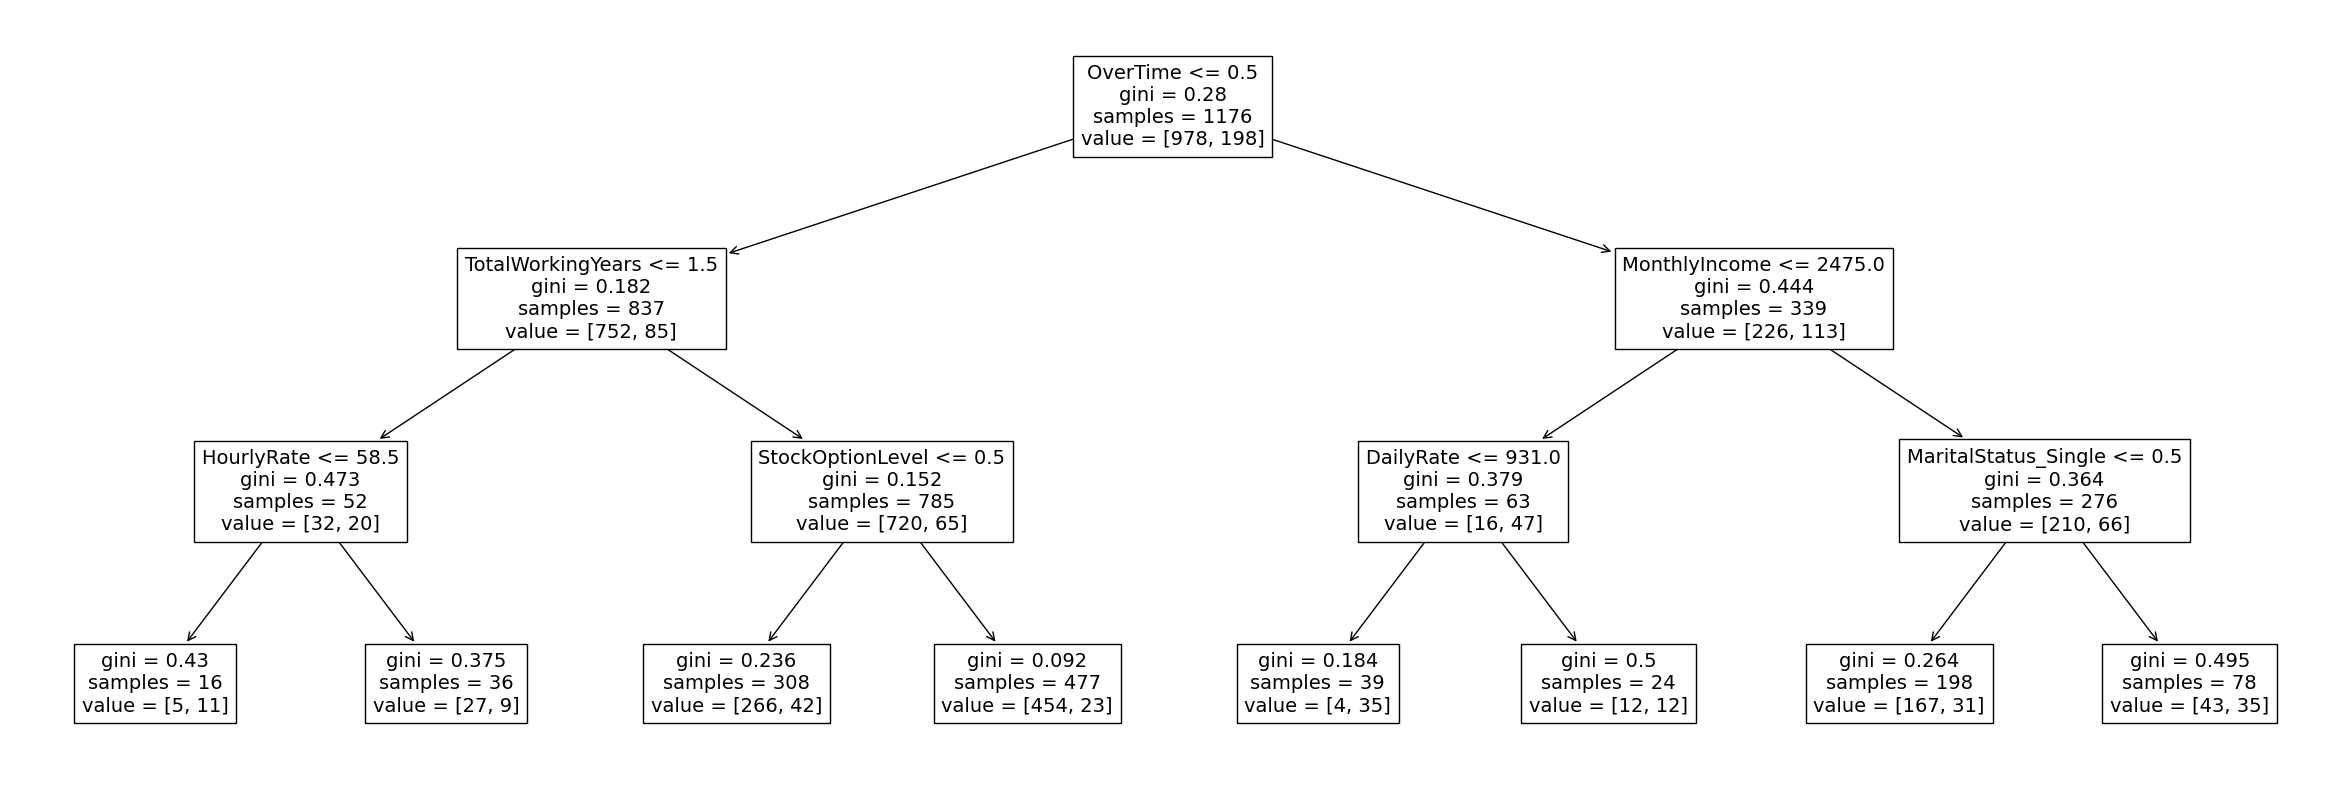

In [133]:
clf = sk.tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
clf.fit(X_train, y_train)

sk.tree.plot_tree(clf, feature_names=X.columns)

In [132]:
y_pred = clf.predict(X_test)

# n_ok = 0
# n_wrong = 0
# for p, t in zip(y_pred, y_test):
#     if p == t:
#         n_ok += 1
#     else:
#         n_wrong += 1

# print(n_ok, n_wrong, n_ok/(n_ok+n_wrong)) ## accuracy

sk.metrics.accuracy_score(y_test, y_pred)

0.8673469387755102

In [110]:
# I have a model that always says "no"
#1.0 - (df["Attrition"].sum() / df.shape[0])